
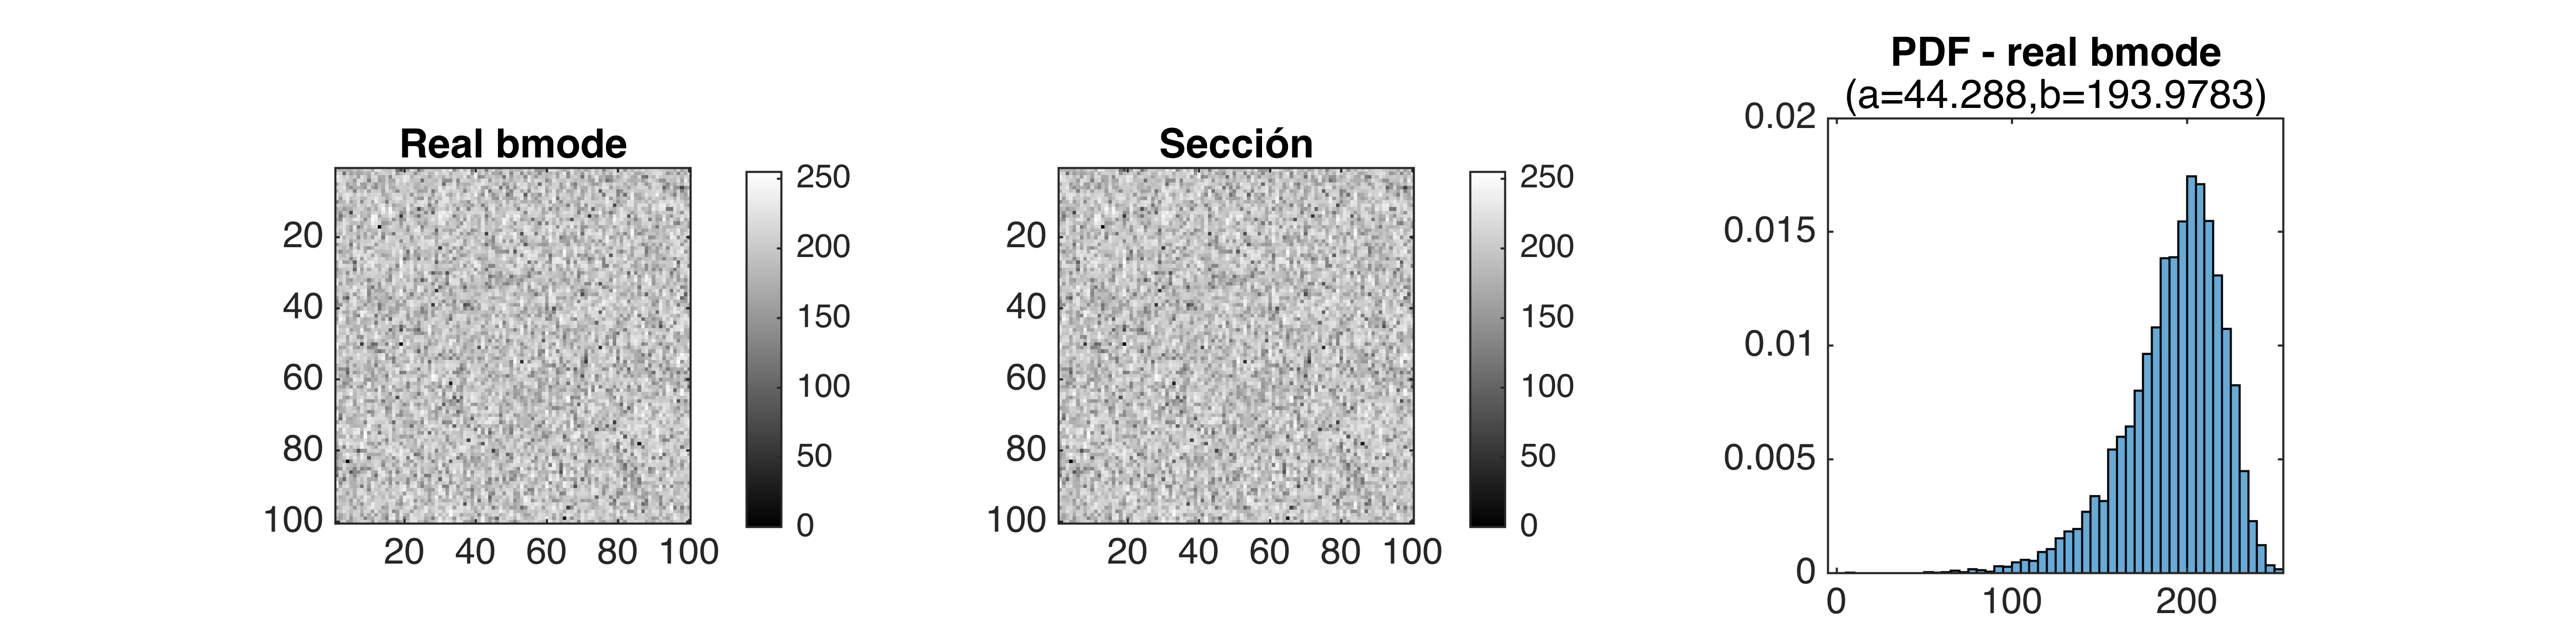

In [1]:
close all; clc;
clearvars -except D_seabra1 D_seabra2

xl=100;yl=100;

load('hkdist_1e5.mat');rf=reshape(data(1:yl*xl),yl,xl);
rf=rf-mean(rf(:));

env_rf=abs(hilbert(rf));
[a_0,b_0]=getab(env_rf);
z=a_0*log(env_rf)+b_0;

f=figure;f.Position=f.Position.*[1 1 1.5 0.5];
subplot(1,3,1);imagesc(z);colormap gray;colorbar;axis image;
title('\bfReal bmode');
subplot(1,3,2);imagesc(z);
colormap gray;colorbar;title('Sección');axis image;
subplot(1,3,3);histogram(z,Normalization='pdf');
title('PDF - real bmode',['(a=',num2str(a_0),',b=',num2str(b_0),')']);axis square;


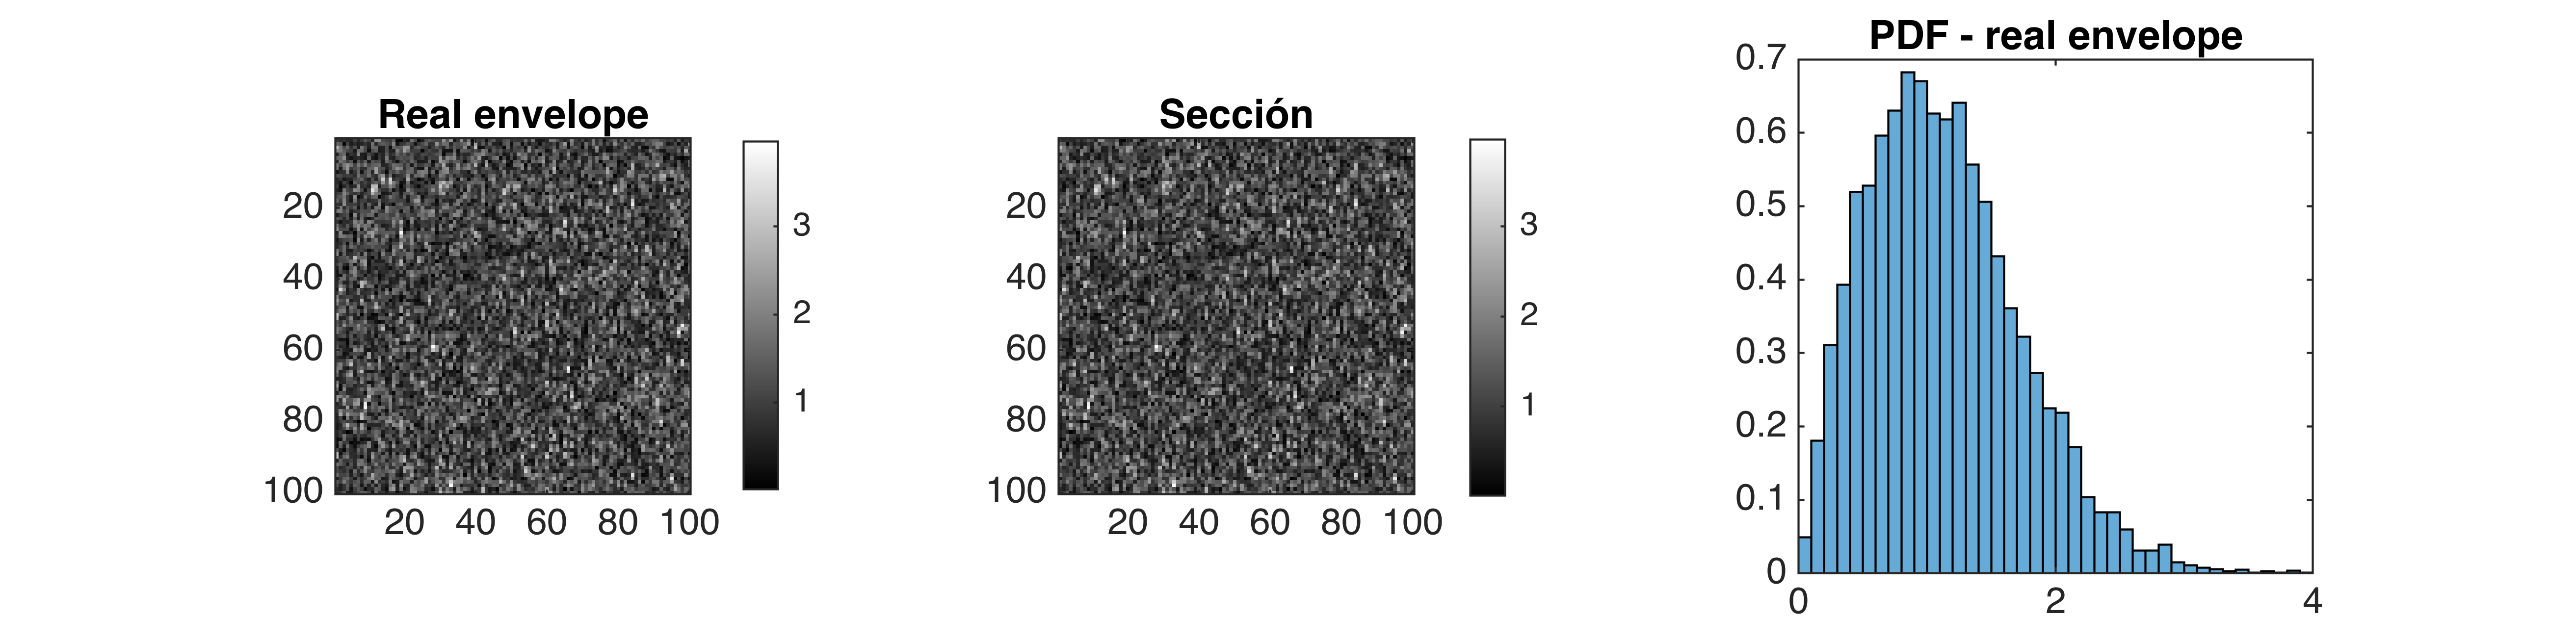

In [2]:

f=figure;f.Position=f.Position.*[1 1 1.5 0.5];
subplot(1,3,1);imagesc(env_rf);
colormap gray;colorbar;title('\bfReal envelope');axis image;
subplot(1,3,2);imagesc(env_rf);
colormap gray;colorbar;title('Sección');axis image;
subplot(1,3,3);histogram(env_rf,Normalization='pdf');
title('PDF - real envelope');axis square;

In [3]:
%%%%%%%%% IMPLEMENTACIÓN prager 1 %%%%%%%%%
D0=30;
% D0=a_0;
% con 50 y hruska funciona bien

n=[0.25 0.5 1.5 2 2.5 3];   % prager
% n=[0.72 0.88];   % hruska
nmom_exp=gamma(n+1);

err_vect_0=optimizarD(D0, z, nmom_exp, n);

intensity=exp(z/a_0);
nmom_real=norm_moment(intensity,n);

D_prager = lsqnonlin(@(D) optimizarD(D, z, nmom_exp, n), D0)

Local minimum found.
Optimization completed because the size of the gradient is less than
the value of the optimality tolerance.
<stopping criteria details>
D_prager = 22.4732


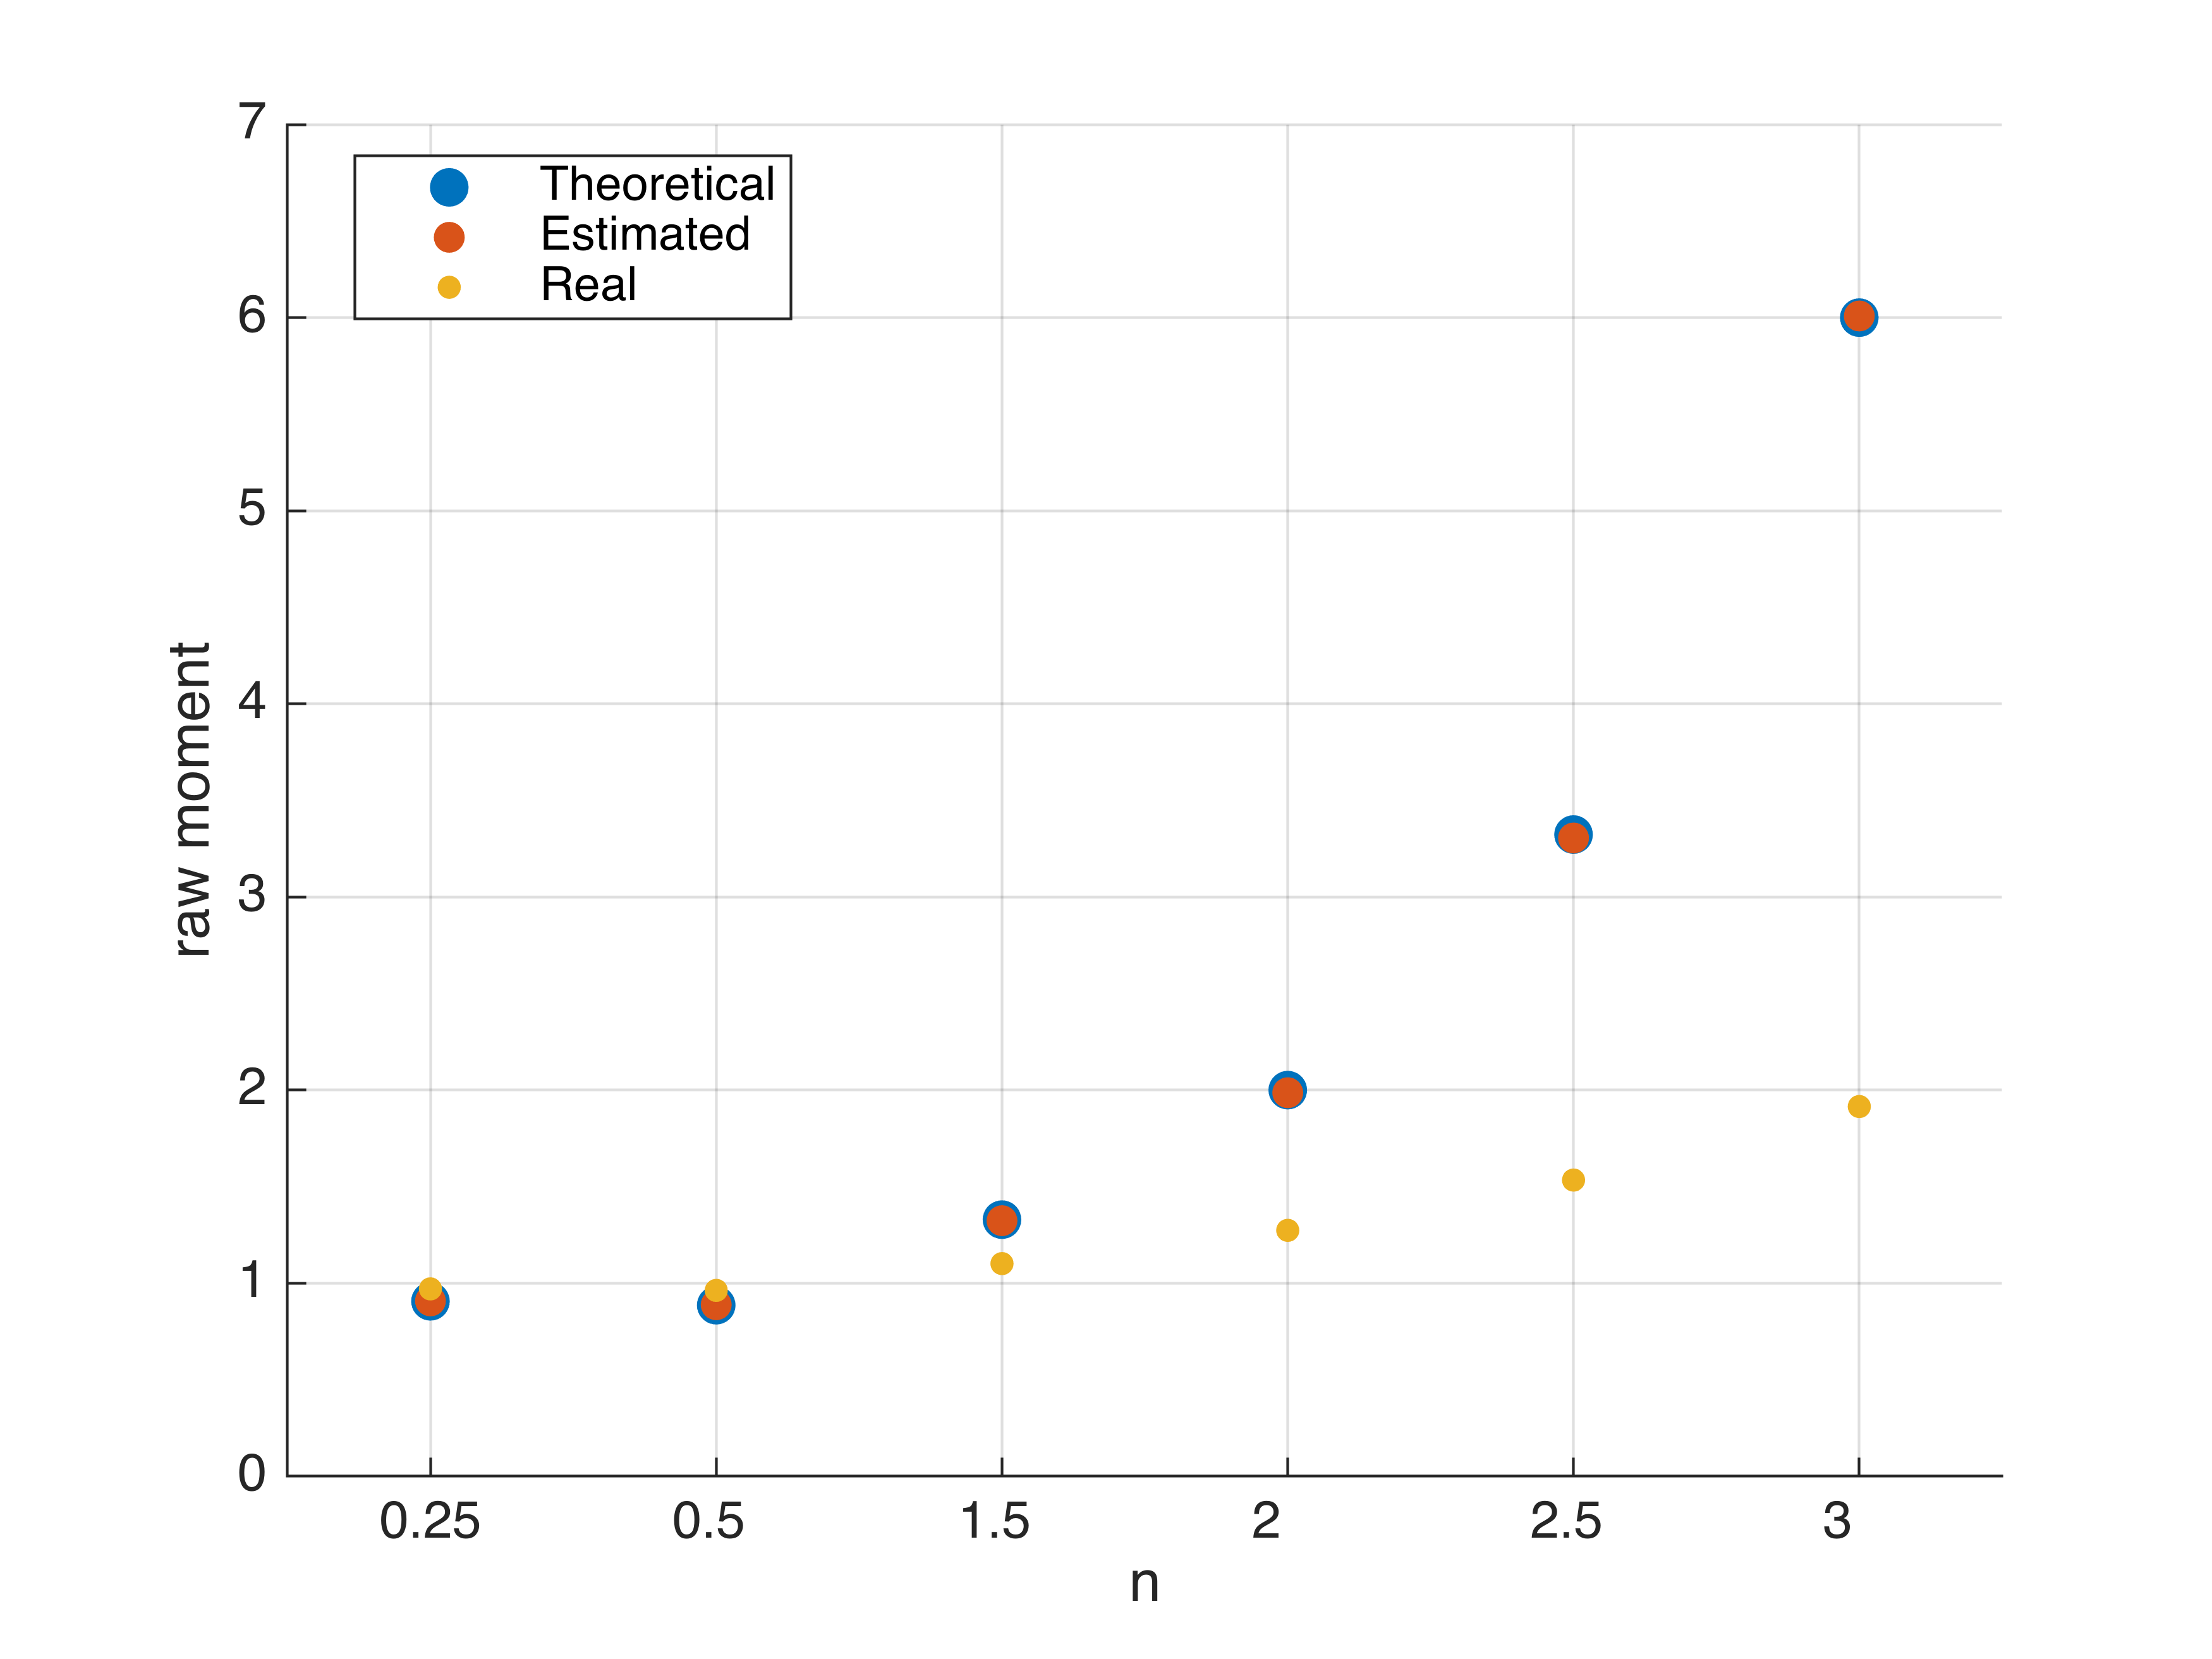

In [4]:


intensity=exp(z/D_prager);
nmom_est=norm_moment(intensity,n);
err_vect=nmom_est-nmom_exp;

figure;hold on;grid on;
plot(nmom_exp ,Marker='.',MarkerSize=25,LineStyle='none');
plot(nmom_est,Marker='.',MarkerSize=20,LineStyle='none');
plot(nmom_real,Marker='.',MarkerSize=15,LineStyle='none');
% xlim([0.5 6.5]);yticks(0:0.5:6.5);xticks(1:6);set(gca,'XTickLabel',n);
xlim([0.5,length(n)+0.5]);xticks(1:length(n));set(gca,'XTickLabel',n);
xlabel('n');ylabel('raw moment')
legend('Theoretical','Estimated','Real',Location='best');

In [5]:

disp(['Mean: ',num2str(mean(err_vect)),newline,'Std:  ',num2str(std(err_vect))]);

Mean: -0.0039749
Std:  0.010228

In [6]:

% D_prager=8.686
y1=exp(z/D_prager);

In [7]:
% vectortest=[0.2385,0.4029,0.6312,0.1425,0.6067,0.5568,0.7286,0.4658,0.9853,0.1102];
% for i=1:5
%     raw_moment(vectortest,i)
% end
% raw_moment(vectortest,1.5)
% % verificado que está ok

In [8]:
%%%%%%%%% IMPLEMENTACIÓN prager 2 %%%%%%%%%
% z es el bmode real de 0 a 255, sin redondear
D_kaplan=2*sqrt(6)/pi*std(z(:));

% D=8.686
y2=exp(z/D_kaplan);


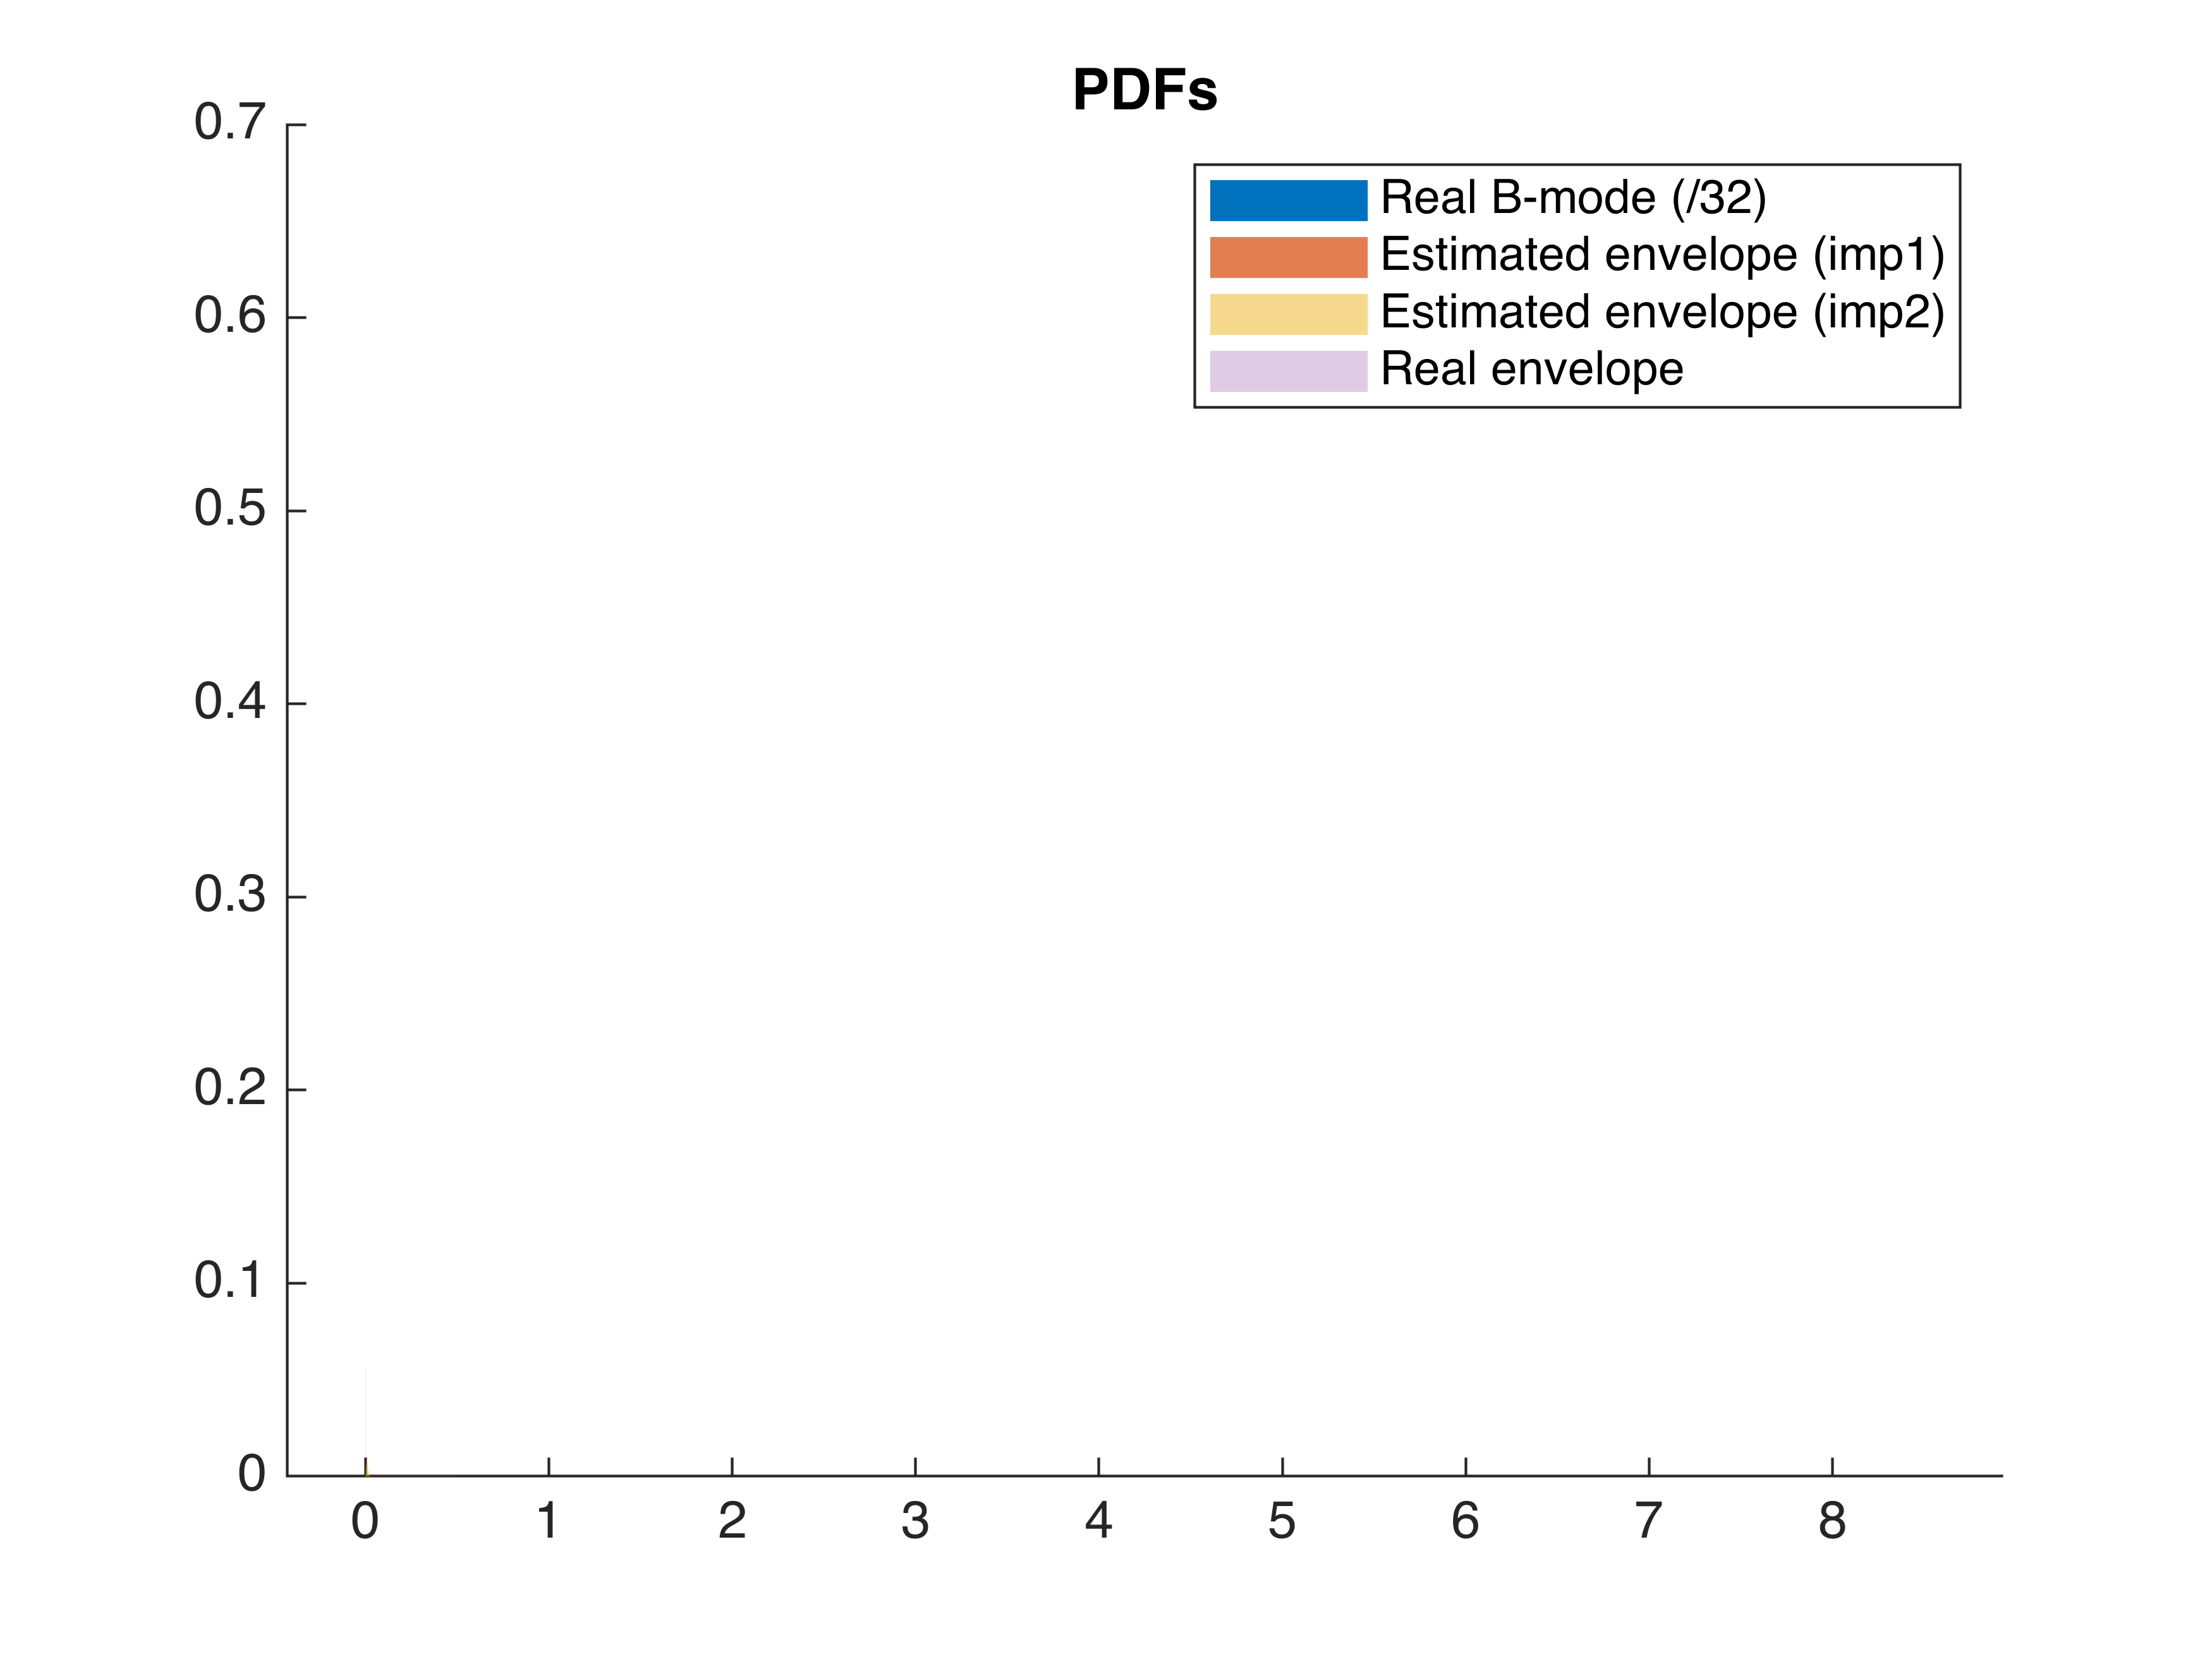

In [9]:
figure;hold on;
histogram(z/32,Normalization='pdf',FaceAlpha=1,EdgeAlpha=0);
histogram(y1,Normalization='pdf',FaceAlpha=0.75,EdgeAlpha=0);
histogram(y2,Normalization='pdf',FaceAlpha=0.5,EdgeAlpha=0);
histogram(env_rf,Normalization='pdf',FaceAlpha=0.25,EdgeAlpha=0);

title('PDFs');
legend('Real B-mode (/32)','Estimated envelope (imp1)','Estimated envelope (imp2)','Real envelope');

In [10]:
Dlabel={'True value:';'seabra2008modeling';'seabra2011rf';'prager2003decompression';'kaplan1993on'};
Dvalues=[a_0;D_seabra1;D_seabra2;D_prager;D_kaplan];
disp('Valores de D');

Valores de D

In [11]:
table(Dlabel,Dvalues)

In [12]:
% clearvars y
% seabra1.y = exp(z/D_seabra1);
% seabra2.y = exp(z/D_seabra2);
% prager.y  = exp(z/D_prager);
% kaplan.y  = exp(z/D_kaplan);
%
% [truevalue.R,truevalue.S]=getRS(env_rf);
% [seabra1.R,seabra1.S]=getRS(seabra1.y);
% [seabra2.R,seabra2.S]=getRS(seabra2.y);
% [prager.R,prager.S]=getRS(prager.y);
% [kaplan.R,kaplan.S]=getRS(kaplan.y);
%
%
% [truevalue.k,truevalue.b]=getkbeta(truevalue.R,truevalue.S);
% [seabra1.k,seabra1.b]=getkbeta(seabra1.R,seabra1.S);
% [seabra2.k,seabra2.b]=getkbeta(seabra2.R,seabra2.S);
% [prager.k,prager.b]=getkbeta(prager.R,prager.S);
% [kaplan.k,kaplan.b]=getkbeta(kaplan.R,kaplan.S);
%
% disp(Dlabel{1})
% struct2table(truevalue,AsArray=true)
%
% disp(Dlabel{2})
% struct2table(seabra1,AsArray=true)
%
% disp(Dlabel{3})
% struct2table(seabra2,AsArray=true)
%
% disp(Dlabel{4})
% struct2table(prager,AsArray=true)
%
% disp(Dlabel{5})
% struct2table(kaplan,AsArray=true)


anterior implementación (no era sensible a D0):

<p style="text-align:left">
   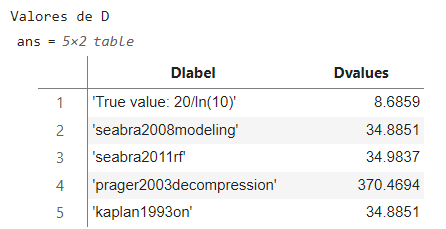
</p>


In [13]:
function mu_n = raw_moment(x,n)
    x=x(:);
    % n: the order of the moment
    % x_values: vector of observed values of the random variable X

    % % anterior implementación:
    % [N,edges] = histcounts(x,Normalization='pdf',NumBins=1e5);
    % edge=edges(2)-edges(1);
    %
    % mu_n=sum(N.*edges(1:end-1).^(n.')*edge,2).';

    % al final resultó ser igual que
    % x=x-mean(x);  % en caso que sea momento central
    mu_n=mean(abs(x).^n);
end

function mu_nn = norm_moment(x,n)
    x=x(:);
    % n: the order of the moment
    % x_values: vector of observed values of the random variable X

    rawmoment=raw_moment(x,n);
    mu_nn=rawmoment./(mean(x).^n);
end

function err_vect=optimizarD(D, z, nmom_exp, n)
    intensity=exp(z/D);
    nmom_data=norm_moment(intensity,n);
    err_vect=nmom_data-nmom_exp;
end

function [R,S]=getRS(y)
    y = y(:);
    R = mean(y)/std(y);
    S = skewness(y);
end

function [k,b]=getkbeta(R,S)
    syms k b
    assume(k > 0)
    assume(b,'real')
    c = k^2+2*b+1;
    E = [R==(k^2+2)/(2*sqrt(c)), ...
         S==(c*(6*b+3)-1)/c^1.5];
    sol=solve(E,k,b,'Real',true);
    % sol=vpasolve(E,k,b)
    k=double(sol.k);
    b=real(double(sol.b));
end